In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("retail_sales_dataset.csv")

In [8]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [10]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [17]:
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [18]:
df.drop_duplicates(inplace=True)

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df.dtypes

,0
Transaction ID,int64
Date,datetime64[ns]
Customer ID,object
Gender,object
Age,int64
Product Category,object
Quantity,int64
Price per Unit,int64
Total Amount,int64


In [22]:
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [25]:
df['Total Amount'].mean()

np.float64(456.0)

In [26]:
df['Total Amount'].median()

135.0

In [27]:
df['Total Amount'].std()

559.997631555123

In [28]:
monthly_sales = df.resample('M', on='Date')['Total Amount'].sum()
monthly_sales

/tmp/ipython-input-1835684775.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Date')['Total Amount'].sum()


,Total Amount
Date,
2023-01-31,35450
2023-02-28,44060
2023-03-31,28990
2023-04-30,33870
2023-05-31,53150
2023-06-30,36715
2023-07-31,35465
2023-08-31,36960
2023-09-30,23620


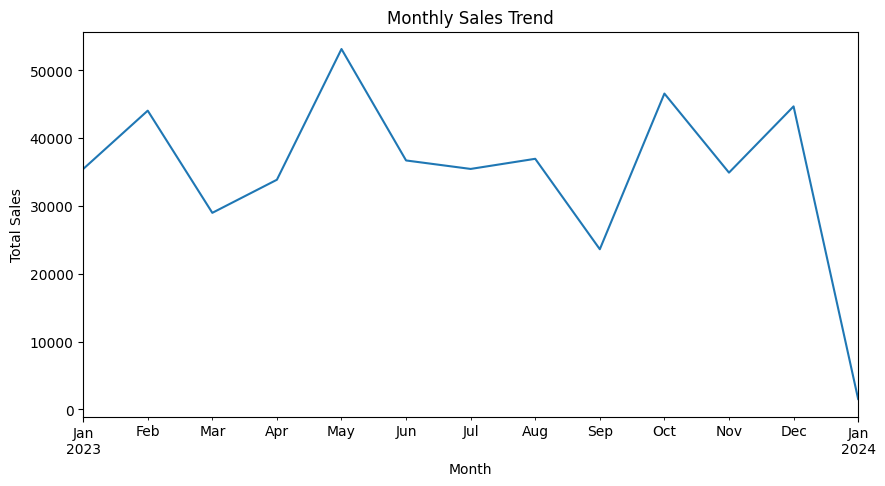

In [29]:
plt.figure(figsize=(10,5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

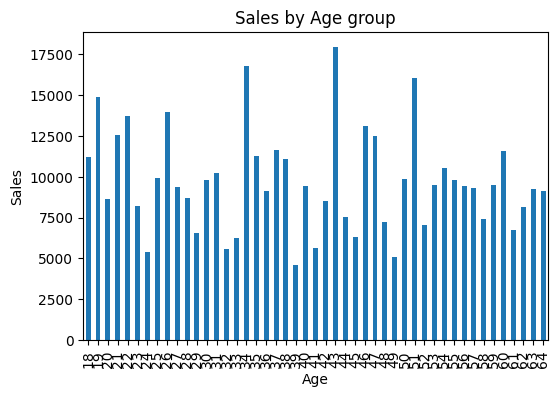

In [36]:
segment_sales = df.groupby('Age')['Total Amount'].sum()

segment_sales.plot(kind='bar', figsize=(6,4))
plt.title("Sales by Age group")
plt.ylabel("Sales")
plt.show()

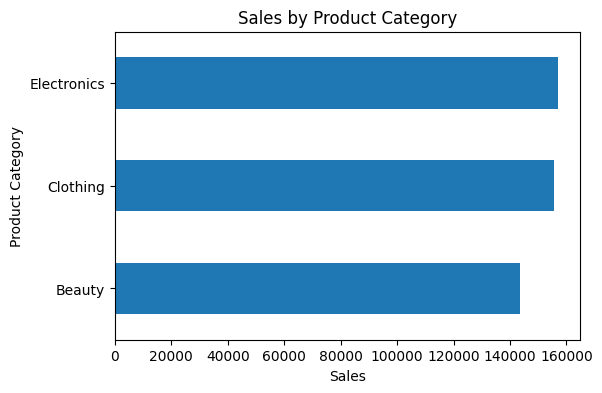

In [34]:
category_sales = df.groupby('Product Category')['Total Amount'].sum()

category_sales.sort_values().plot(kind='barh', figsize=(6,4))
plt.title("Sales by Product Category")
plt.xlabel("Sales")
plt.show()

In [38]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

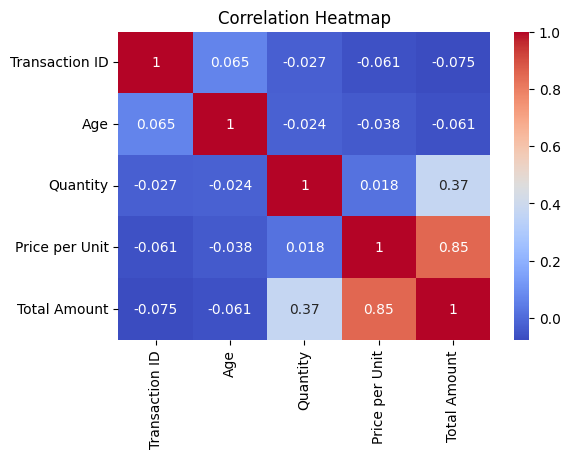

In [39]:
plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

• Total Amount show seasonal trends
• Age generates highest revenue
• Electronic category has highest sales
• High discounts reduce profit margins

• Increase stock before peak months
• Target corporate customers with offers
• Improve pricing for low-profit categories
• Use data-driven inventory planning